## Before learning about Naive Bayse Algorithm,lets learn about probability first
<h2 style = 'color:purple;'>What is probability then?</h2>

### When we flip a coin,the probability of getting head is 1/2,also geetting tail is 1/2.<br><br>Also on the deck of 52 card,the probality of getting queen(4 queen in 52 card) is 4/52
<h2 style = 'color:purple;'>What is conditional probability then?</h2>

### Conditional probability is the probability of an event happening given that another event has already happened.In a simple word,It’s just the chance of something happening after you know something else.For example,in a bag there were 5 red,5 blue balls.Now one picked up all the blue ball but we dont know about it.So for us probability of getting red ball when we pick one of them is 5/10.But when we know that there is only red ball in the bag,then the condiitional probability is 100% i.e. chance of picking red balls after we know our bag only contains redballs.<br><br>For a deck of 52 cards tooo,before we know that 52 card contains 12 face card probability of picking 1 queen is 1/52.But after knowing that our deck contains 12 face card,chance of picking queen card becomes 1/12

### Conditional Probability can be writtten as <br><br> P(A/B) = P(B/A)*P(A)/P(B) Here P(A/B) means probability of getting A knowing that B have already occured.<br>Above example can be written as p(queen/diamond) = p(diamond/queen) * p(queen)/p(diamon) where p(queen/diamond) means probability of getting queen when we know diamond is already there

### Lets apply naive bayse algorithm in a titanic dataset to find the prbability of passengere survival given the fare,cabin,crew and other details.So it is probability of finding A(survived) assuming that B(fare,cabin,crew and other details) have already occured

In [9]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv('train.csv')

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df= df[['Pclass','Sex','Age','Fare','Survived']]

In [21]:
df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [25]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [57]:
Sex = pd.get_dummies(df['Sex'],dtype=np.int32)
new_df = pd.concat([df.drop('Sex',axis=1),age],axis=1)


In [59]:
new_df

,Pclass,Age,Fare,Survived,female,male
0,3,22.0,7.2500,0,0,1
1,1,38.0,71.2833,1,1,0
2,3,26.0,7.9250,1,1,0
3,1,35.0,53.1000,1,1,0
4,3,35.0,8.0500,0,0,1
...,...,...,...,...,...,...
886,2,27.0,13.0000,0,0,1
887,1,19.0,30.0000,1,1,0
888,3,NaN,23.4500,0,1,0
889,1,26.0,30.0000,1,0,1


### There are 177 null values in Age columns,so lets fill that column using KNN inputer

In [62]:
from sklearn.impute import KNNImputer
ki = KNNImputer(n_neighbors=4)

### n-neighbors = 4 means it will consider the nearest neighbouring row(inlcuding all columns) from all the tuples in the dataset.

In [70]:
data = ki.fit_transform(new_df)
data = pd.DataFrame(data)
data.columns = new_df.columns

In [72]:
data

,Pclass,Age,Fare,Survived,female,male
0,3.0,22.0,7.2500,0.0,0.0,1.0
1,1.0,38.0,71.2833,1.0,1.0,0.0
2,3.0,26.0,7.9250,1.0,1.0,0.0
3,1.0,35.0,53.1000,1.0,1.0,0.0
4,3.0,35.0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...
886,2.0,27.0,13.0000,0.0,0.0,1.0
887,1.0,19.0,30.0000,1.0,1.0,0.0
888,3.0,28.0,23.4500,0.0,1.0,0.0
889,1.0,26.0,30.0000,1.0,0.0,1.0


In [74]:
data.isnull().sum()

Pclass      0
Age         0
Fare        0
Survived    0
female      0
male        0
dtype: int64

### Taking all the values to their own scale

In [76]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [100]:
new_data = mms.fit_transform(data)

In [102]:
new_data = pd.DataFrame(new_data,columns = data.columns)

In [104]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) ### n_components means i want to reduce 8D data to 3D

In [106]:
dfa = pca.fit_transform(new_data)

In [108]:
dfa = pd.DataFrame(dfa)

In [110]:
dfa

,0,1,2
0,-0.671157,0.256902,0.080375
1,1.194240,-0.437417,-0.207787
2,1.026727,0.399201,0.344966
3,1.193982,-0.428755,-0.198314
4,-0.675446,0.234137,0.049346
...,...,...,...
886,-0.588863,-0.154757,-0.190291
887,1.197729,-0.396548,-0.157284
888,0.532395,0.803406,-0.420739
889,-0.009045,-0.968733,0.310823


### Here our 8D data has been converted to 3D

In [113]:
from sklearn.model_selection import train_test_split
X = new_data.drop('Survived',axis=1)
Y = new_data['Survived']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=43)

In [115]:
X_train.shape,X_test.shape,new_data.shape

((712, 5), (179, 5), (891, 6))

In [119]:
from sklearn.naive_bayes import GaussianNB
GN = GaussianNB()

In [121]:
GN.fit(X_train,Y_train)

GaussianNB()

In [123]:
Y_pred = GN.predict(X_test)

In [125]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(Y_test,Y_pred)

0.7318435754189944

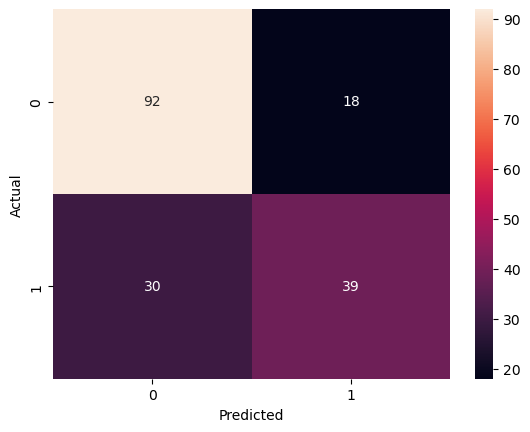

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
conf = confusion_matrix(Y_test,Y_pred)
sns.heatmap(conf,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Now lets apply PCA and anlyze the accuracy

In [134]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) ## n_components=3 means we want to convert 8D data into 3D

In [138]:
X_train_trs = pca.fit_transform(X_train)
X_test_trs = pca.transform(X_test)

In [142]:
X_train_trs = pd.DataFrame(X_train_trs)
X_test_trs = pd.DataFrame(X_test_trs)

In [144]:
GBB = GaussianNB()
GBB.fit(X_train_trs,Y_train)

GaussianNB()

In [146]:
Y_p = GBB.predict(X_test_trs)

In [148]:
accuracy_score(Y_test,Y_p)

0.7318435754189944

In [150]:
## Here we have get same accuracy score by 3D data instead of 8D one